<a href="https://colab.research.google.com/github/nyamashi/BigDL-dev/blob/main/BigDL/orca/notebooks/tf2_keras_learning2rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning-to-Rank via Orca with TF Ranking and TF Recommenders

based on 
- https://github.com/intel-analytics/BigDL/blob/main/python/orca/colab-notebook/quickstart/keras_lenet_mnist.ipynb
- https://github.com/tensorflow/recommenders/blob/main/docs/examples/listwise_ranking.ipynb



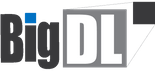
---

##### Copyright 2016 The BigDL Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

## **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [1]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [2]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca[ray] -q

     |████████████████████████████████| 23.9 MB 55.2 MB/s 
     |████████████████████████████████| 101.0 MB 54 kB/s 
     |████████████████████████████████| 35.4 MB 1.2 MB/s 
     |████████████████████████████████| 71.0 MB 376 bytes/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 57.6 MB 1.2 MB/s 
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 61.7 MB/s 
     |████████████████████████████████| 271 kB 86.1 MB/s 
     |████████████████████████████████| 144 kB 65.2 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 218.4 MB 58 kB/s 
     |████████████████████████████████| 197 kB 75.5 MB/s 
     |████████████████████████████████| 220 kB 60.9 MB/s 
     |████████████████████████████████| 82 kB 206 kB/s 
     |████████████████████████████████| 128 kB 88.4 MB/s 
     |████████████████████████████████| 202 kB 95.9 MB/s 
     |████████████

In [3]:
!pip show bigdl-orca ray

Name: bigdl-orca
Version: 2.1.0b20220303
Summary: Seamlessly scale out TensorFlow and PyTorch for Big Data (using Spark & Ray)
Home-page: https://github.com/intel-analytics/analytics-zoo
Author: BigDL Authors
Author-email: bigdl-user-group@googlegroups.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: bigdl-tf, bigdl-dllib, packaging, filelock, conda-pack, pyzmq, bigdl-math
Required-by: 
---
Name: ray
Version: 1.9.2
Summary: Ray provides a simple, universal API for building distributed applications.
Home-page: https://github.com/ray-project/ray
Author: Ray Team
Author-email: ray-dev@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: grpcio, pyyaml, filelock, numpy, click, attrs, msgpack, jsonschema, redis, protobuf
Required-by: 


In [4]:
!pip install numpy --upgrade # --ignore-installed

In [5]:
!pip install tensorflow==2.7.0 tensorflow-recommenders tensorflow-ranking -q

     |████████████████████████████████| 489.6 MB 26 kB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 141 kB 61.6 MB/s 
     |████████████████████████████████| 463 kB 58.0 MB/s 
     |████████████████████████████████| 1.3 MB 56.2 MB/s 


In [6]:
!pip show tensorflow tensorflow-recommenders tensorflow-ranking

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: protobuf, wheel, tensorflow-estimator, tensorboard, numpy, opt-einsum, absl-py, wrapt, flatbuffers, astunparse, gast, tensorflow-io-gcs-filesystem, six, keras, libclang, termcolor, keras-preprocessing, typing-extensions, h5py, google-pasta, grpcio
Required-by: tensorflow-serving-api, tensorflow-recommenders, kapre
---
Name: tensorflow-recommenders
Version: 0.6.0
Summary: Tensorflow Recommenders, a TensorFlow library for recommender systems.
Home-page: https://github.com/tensorflow/recommenders
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: absl-py, tensorflow
Required-by: 
---
Name: tensorflow-ranking
Version: 0.5.0

In [7]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
import tensorflow_ranking as tfr
print(tf.__version__)
print(tfrs.__version__)
print(tfr.__version__)

2.7.0
v0.6.0
0.5.0.dev


## **Distributed TensorFlow 2 using Orca APIs**

In this guide we will describe how to scale out TensorFlow 2 programs using Orca in 4 simple steps.

In [8]:
# import necesary libraries and modules
import argparse

import bigdl.orca
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

### **Step 1: Init Orca Context** 

In [9]:
# recommended to set it to True when running BigDL in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=1) # run in local mode
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-03-03 06:20:58 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-03-03 06:21:02,520 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-03 06:21:02,525 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-03 06:21:02,527 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-03-03 06:21:02,528 Thread-4 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-03-03 06:21:02 [Thread-4] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-03-03 06:21:02 [Thread-4] INFO  Engine$:123 - Executor number is 1 and executor cores number is 1
22-03-03 06:21:03 [Thread-4] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 14
2022-03-03 06:21:03 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-03-03 06:21:03 [Thread-4] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registe


User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://bigdl.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster.

### **Step 3: Define Dataset**


In [10]:
!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip && unzip ml-1m.zip
# ! cat ./ml-1m/README

--2022-03-03 06:21:04--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  6.77MB/s    in 0.8s    

2022-03-03 06:21:05 (6.77 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         


In [11]:
def prepare_ml_sdfs(spark, data_path = './ml-1m/', verbose=False):
    data_path = os.path.join(data_path, "{}.dat")
    dataset = { 
        "ratings": ['userid', 'movieid',  'rating', 'timestamp'],
        "users": ["userid", "gender", "age", "occupation", "zip-code"],
        "movies": ["movieid", "title", "genres"]
    }
    # UserID::MovieID::Rating::Timestamp
    # UserID::Gender::Age::Occupation::Zip-code
    # MovieID::Title::Genres
    sdfs = dict()
    for data, cols in dataset.items():
        sdf_tmp = spark.read.csv(data_path.format(data), sep =':', header = False)
        tmp_cols = sdf_tmp.columns
        sdfs[data] = sdf_tmp.select(tmp_cols[::2]).toDF(*cols)
    return sdfs

spark = OrcaContext.get_spark_session()
sdfs = prepare_ml_sdfs(spark)

In [12]:
def join_sdfs(sdfs, users=False):
    sdf_joined = sdfs["ratings"].join(sdfs["movies"], "movieid").dropna()
    if users:
        sdf_joined = sdf_joined.join(sdfs["users"], "userid").dropna()
    return sdf_joined

sdf_joined = join_sdfs(sdfs)
sdf_joined.show(4, False)

+-------+------+------+---------+--------------------------------------+----------------------------+
|movieid|userid|rating|timestamp|title                                 |genres                      |
+-------+------+------+---------+--------------------------------------+----------------------------+
|1193   |1     |5     |978300760|One Flew Over the Cuckoo's Nest (1975)|Drama                       |
|661    |1     |3     |978302109|James and the Giant Peach (1996)      |Animation|Children's|Musical|
|914    |1     |3     |978301968|My Fair Lady (1964)                   |Musical|Romance             |
|3408   |1     |4     |978300275|Erin Brockovich (2000)                |Drama                       |
+-------+------+------+---------+--------------------------------------+----------------------------+
only showing top 4 rows



In [13]:
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, ArrayType

# cast
sdf_all = sdf_joined.withColumn("rating", F.col("rating").cast("int"))

In [14]:
 sdf_train, sdf_test = sdf_all.randomSplit([0.85, 0.15], seed=1)

In [15]:
def userid_agg(sdf):
    cols = ["title", "rating"]
    f_cols = [F.col(col) for col in cols]
    sdf_agg = (
        sdf.groupBy("userid").agg(
            F.collect_list(F.struct(*cols)).alias("agg")
        )
    )
    def split_cols(data_list):
        ret = [[] for col in cols]
        for data in data_list:
            for n, d in enumerate(data):
                ret[n].append(d)
        return ret

    def split_cols_map(partition):
        for row in partition:
            splits = split_cols(row["agg"])
            yield [row["userid"], *splits]
    cols_out = [ col + "s" for col in cols]

    return sdf_agg.rdd.mapPartitions(split_cols_map).toDF(["userid", *cols_out])

sdf_list = userid_agg(sdf_train)
sdf_list.printSchema()

[Stage 6:>                                                          (0 + 1) / 1]

root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: long (containsNull = true)



In [16]:
sdf_list.show(3, False)

+------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
unique_movie_titles = [x["title"] for x in sdfs["movies"].select("title").distinct().collect()]
unique_userids = [x["userid"] for x in sdfs["users"].select("userid").distinct().collect()]

print(len(unique_movie_titles), len(unique_userids))
print(unique_movie_titles[0:2])
print(unique_userids[0:2])

[Stage 13:================================================>     (178 + 1) / 200]

3865 6040
['Fair Game (1995)', 'If Lucy Fell (1996)']
['296', '467']


In [18]:
unique_movie_titles[0:2]

['Fair Game (1995)', 'If Lucy Fell (1996)']

### **3. Model**

In [20]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
import tensorflow_ranking as tfr

def repeat_and_ragged_like_target(not_ragged_src, ragged_target, ragged_target_axis):
    # ragged lengths
    rl = ragged_target.row_lengths(axis=ragged_target_axis)
    # max length
    max_rl = tf.math.reduce_max(rl)
    not_ragged_src_repeated = tf.repeat(
        tf.expand_dims(not_ragged_src, axis=ragged_target_axis),
        [max_rl],
        axis=ragged_target_axis
    )
    # masking with ragged lengths
    msk = tf.sequence_mask(rl)
    # make ragged tensor like the target
    ragged_src = tf.ragged.boolean_mask(not_ragged_src_repeated, msk)

    return ragged_src


class RaggedRankingModel(tfrs.Model):

    def __init__(self, unique_userids, unique_movie_titles, loss, embedding_dimension=32, ragged_input=False):
        super().__init__()
        self.ragged_input = ragged_input
        self._loss = loss

        # Compute embeddings for users.
        self.user_embeddings = tf.keras.Sequential([
            tf.keras.Input(shape=(), dtype=tf.string),
            tf.keras.layers.StringLookup(vocabulary=unique_userids),
            tf.keras.layers.Embedding(len(unique_userids) + 2, embedding_dimension)
        ], name="user_emb")

        # Compute embeddings for movies.
        self.movie_embeddings = tf.keras.Sequential([
            tf.keras.Input(shape=(None,), dtype=tf.string, ragged=True),
            tf.keras.layers.StringLookup(vocabulary=unique_movie_titles),
            tf.keras.layers.Embedding(len(unique_movie_titles) + 2, embedding_dimension)
        ], name="movie_emb")

        # Compute predictions.
        self.score_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(1)
        ], name="MLP")

        self.task = tfrs.tasks.Ranking(
            loss=self._loss,
            metrics=[
               tfr.keras.metrics.NDCGMetric(name="ndcg_metric", ragged=True),
               tf.keras.metrics.RootMeanSquaredError()
            ]
        )

    def call(self, features):

        userid = features[0]
        titles = features[1]
    
        user_emb = self.user_embeddings(userid)
        if not self.ragged_input:
            titles = tf.ragged.constant(titles)
        movie_emb = self.movie_embeddings(titles)

        user_emb_repeated = repeat_and_ragged_like_target(
            user_emb,
            movie_emb,
            ragged_target_axis=-2
        )

        concatenated_emb = tf.concat(
            [user_emb_repeated, movie_emb], axis=-1
        )

        scores = self.score_model(concatenated_emb)

        return tf.squeeze(scores, axis=-1)

    
    def compute_loss(self, inputs, training=False):

        features, labels = inputs
        if not self.ragged_input:
            labels = tf.ragged.constant(labels, dtype=tf.float32)
        
        scores = self(features)

        return self.task(
            labels=labels,
            predictions=scores
        )

model = RaggedRankingModel(
    unique_userids,
    unique_movie_titles,
    tfr.keras.losses.MeanSquaredLoss(tf.losses.Reduction.SUM, ragged=True),
    ragged_input=True
)

In [21]:
pdf = sdf_list.limit(10).toPandas()
pdf

,userid,titles,ratings
0,1090,"[Doors, The (1991), Braveheart (1995), One Fle...","[3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, ..."
1,1159,"[20,000 Leagues Under the Sea (1954), Lawnmowe...","[3, 2, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 2, 1, 2, ..."
2,1436,"[Ben-Hur (1959), L.A. Confidential (1997), Doc...","[4, 5, 4, 3, 4, 5, 5, 3, 5, 4, 5, 4, 4, 4, 4, ..."
3,1512,"[Braveheart (1995), Bob Roberts (1992), Boogie...","[5, 4, 4, 3, 2, 5, 4, 4, 2, 3, 1, 5, 2, 3, 3, ..."
4,1572,"[Braveheart (1995), Benny & Joon (1993), My Ow...","[4, 3, 2, 2, 2, 2, 3, 3, 3, 4, 4, 2, 5, 2, 3, ..."
5,2069,"[Murder, My Sweet (1944), E.T. the Extra-Terre...","[4, 2, 4, 3, 4, 5, 4, 4, 4, 5, 3, 5, 5, 3, 4, ..."
6,2088,"[GoldenEye (1995), Swiss Family Robinson (1960...","[5, 3, 4, 4, 2, 5, 3, 4, 5, 5, 5, 4, 5, 3, 5, ..."
7,2136,"[Toy Story (1995), Angels in the Outfield (199...","[4, 4, 2, 5, 4, 3, 3, 4, 4, 2, 5, 3, 4, 4, 5, ..."
8,2162,"[Cool Runnings (1993), Cinderella (1950), Swor...","[4, 4, 2, 5, 5, 4, 3, 5, 2, 5, 3, 5, 1, 3, 5, ..."
9,2294,"[Fish Called Wanda, A (1988), E.T. the Extra-T...","[3, 4, 4, 5, 5, 5, 4, 3, 4, 4, 3, 5, 4, 4, 4, ..."


In [22]:
def pdf2tf_ragged(pdf):
    return (
        (
            tf.constant(pdf["userid"].to_list()),
            tf.ragged.constant(pdf["titles"].to_list())
        ),
        tf.ragged.constant(pdf['ratings'].to_list(), dtype=tf.float32)
    )

features, labels = pdf2tf_ragged(pdf)

In [23]:
scores = model(features)
scores.shape


TensorShape([10, None])

In [24]:
loss_value = model.compute_loss((features, labels))
loss_value 


<tf.Tensor: shape=(), dtype=float32, numpy=14648.088>

In [25]:
import numpy as np

def padded2ragged(padded, padding):
    mask = tf.not_equal(padded, padding)
    ragged = tf.ragged.boolean_mask(padded, mask)
    return ragged


class PaddedToRaggedRankingModel(RaggedRankingModel):

    MASK_TOKEN = "<MSK>"
    MASK_RATING = -1

    def __init__(self, unique_userids, unique_movie_titles, loss, embedding_dimension=32):
        super().__init__(
            unique_userids,
            unique_movie_titles,
            loss,
            embedding_dimension,
            ragged_input=True
        )

    def _pad2ragged_features(self, features):
        users, titles = features
        if not isinstance(titles, tf.RaggedTensor):
            titles = padded2ragged(titles, self.MASK_TOKEN)
            return (users, titles)
        else:
            return features

    def call(self, features, padding=True):
        features = self._pad2ragged_features(features)
        scores = super().call(features)
        if padding:
            scores = scores.to_tensor(np.inf)
        return scores

    def compute_loss(self, inputs, training=False):
        features, labels = inputs
        labels = padded2ragged(labels, self.MASK_RATING)
        labels = tf.cast(labels, dtype=tf.float32)

        scores = self.call(features, padding=False)
        return self.task(
            labels=labels,
            predictions=scores,
        )

pad_model = PaddedToRaggedRankingModel(
    unique_userids,
    unique_movie_titles,
    tfr.keras.losses.MeanSquaredLoss(tf.losses.Reduction.SUM, ragged=True),
)



### Padding Dataframe
Orca does not support variable length columns now, so we make all list/array columns the same lengths. 

In [26]:
def list2pad_list(sdf_list):

    len_udf = F.udf(lambda x: len(x), IntegerType())
    sdf_list_len = sdf_list.withColumn("len", len_udf(F.col("ratings"))).sort(F.desc("len"))

    def pad_list(lst, length, size, padding=None):
        pad_size = size - length
        return [*lst, *[padding] * pad_size]
    
    max_len = sdf_list_len.agg({"len": "max"}).collect()[00]["max(len)"]

    print("max_len", max_len)

    pad_str_udf = F.udf(lambda x, y: pad_list(x, y, max_len, PaddedToRaggedRankingModel.MASK_TOKEN), ArrayType(StringType(), True))
    pad_int_udf = F.udf(lambda x, y: pad_list(x, y, max_len, PaddedToRaggedRankingModel.MASK_RATING), ArrayType(IntegerType(), True))

    sdf_list_padded = (
        sdf_list_len
        .withColumn("titles", pad_str_udf(F.col("titles"), F.col("len")))
        .withColumn("ratings", pad_int_udf(F.col("ratings"), F.col("len")))
        .sort(F.desc("len"))
    )
    return sdf_list_padded

sdf_list_padded = list2pad_list(sdf_list)
sdf_list_padded.printSchema()


[Stage 20:===================================================>  (156 + 1) / 165]

max_len 1922
root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)



In [27]:
pdf = sdf_list_padded.limit(10).toPandas()
pdf

,userid,titles,ratings,len
0,4169,"[GoldenEye (1995), City Hall (1996), Extreme M...","[4, 3, 3, 2, 4, 3, 3, 5, 4, 4, 4, 5, 3, 5, 4, ...",1922
1,1680,"[Extreme Measures (1996), Glimmer Man, The (19...","[4, 2, 4, 5, 3, 3, 4, 4, 4, 4, 4, 3, 1, 4, 4, ...",1459
2,4277,"[Toy Story (1995), GoldenEye (1995), City Hall...","[5, 4, 5, 4, 4, 3, 5, 4, 4, 4, 5, 5, 4, 5, 4, ...",1428
3,1941,"[GoldenEye (1995), Apple Dumpling Gang, The (1...","[4, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 4, 3, ...",1258
4,1181,"[GoldenEye (1995), Glimmer Man, The (1996), Ch...","[4, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 5, 2, 2, ...",1218
5,889,"[Toy Story (1995), Bottle Rocket (1996), Old Y...","[4, 2, 5, 2, 2, 4, 3, 2, 4, 2, 2, 4, 4, 4, 3, ...",1213
6,3618,"[Toy Story (1995), GoldenEye (1995), City Hall...","[2, 3, 3, 3, 3, 2, 4, 5, 3, 2, 3, 4, 2, 3, 4, ...",1122
7,1150,"[Extreme Measures (1996), That Darn Cat! (1965...","[2, 2, 1, 2, 4, 2, 5, 3, 2, 2, 3, 1, 2, 4, 3, ...",1070
8,1015,"[City Hall (1996), Bottle Rocket (1996), 20,00...","[2, 3, 4, 3, 3, 5, 5, 5, 3, 2, 5, 4, 4, 5, 4, ...",1065
9,1980,"[Toy Story (1995), Chamber, The (1996), Apple ...","[4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 4, 1, 2, 4, ...",1041


In [29]:
def pdf2tf_constant(pdf):
    return (
        (
            tf.constant(pdf["userid"].to_list()),
            tf.constant(pdf["titles"].to_list())
        ),
        tf.constant(pdf['ratings'].to_list(), dtype=tf.float32)
    )

features, labels = pdf2tf_constant(pdf)

In [30]:
scores = pad_model(features)
print(scores.shape)
scores = pad_model(features, padding=False)
print(scores.shape)

loss_value = pad_model.compute_loss((features, labels))
print(loss_value)

(10, 1922)
(10, None)
tf.Tensor(157169.78, shape=(), dtype=float32)


In [28]:
sdf_list_padded_all =  list2pad_list(
    userid_agg(sdf_all)
)

sdf_list_padded_test =  list2pad_list(
    userid_agg(sdf_test)
)
sdf_list_padded_test.printSchema()
sdf_list_padded_test.show(3, False)

    

max_len 2234


max_len 312
root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)



[Stage 49:>                                                         (0 + 1) / 1]

+------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
model_config = {
    "learning_rate": 0.1,
    "user_ids": unique_userids,
    "movie_titles": unique_movie_titles,
}


def create_model(config):
    loss = tfr.keras.losses.ListMLELoss(tf.losses.Reduction.SUM, ragged=True)
    model = PaddedToRaggedRankingModel(
        unique_userids=config["user_ids"],
        unique_movie_titles=config["movie_titles"],
        loss=loss
    )
    model.compile(
        tf.keras.optimizers.Adam(learning_rate=config["learning_rate"]),
        loss=loss,
        metrics=model.metrics
    )
    # dummy to build graph
    model((np.array(['0,']), np.array([['x', 'y'], ])))
    return model


model = create_model(model_config)
model.summary()

Model: "padded_to_ragged_ranking_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 user_emb (Sequential)       (None, 32)                193344    
                                                                 
 movie_emb (Sequential)      (None, None, 32)          123744    
                                                                 
 MLP (Sequential)            (1, None, 1)              33153     
                                                                 
 ranking_2 (Ranking)         multiple                  0 (unused)
                                                                 
Total params: 350,241
Trainable params: 350,241
Non-trainable params: 0
_________________________________________________________________


In [32]:
def test_row(row, model):
    features = [ np.array([row[key]]) for key in ["userid", "titles"]]

    print(features[0].shape, features[1].shape)
    labels = np.array([row["ratings"]])
    print(labels.shape)
    scores = model(features, padding=False)
    print(scores.shape)
    scores = model(features, padding=True)
    print(scores.shape)
    loss_value = model.compute_loss((features, labels))
    print(loss_value) 

for row in sdf_list_padded.take(1):
    test_row(row, model)

for row in sdf_list_padded_test.take(1):
    test_row(row, model)

(1,) (1, 1922)
(1, 1922)
(1, None)
(1, 1922)
tf.Tensor(12614.76, shape=(), dtype=float32)


[Stage 59:>                                                         (0 + 1) / 1]

(1,) (1, 312)
(1, 312)
(1, None)
(1, 312)
tf.Tensor(1483.7595, shape=(), dtype=float32)


In [33]:
all_data_count = sdf_list_padded_all.count()
train_data_count = sdf_list_padded.count()
test_data_count = sdf_list_padded_test.count()

print(train_data_count, test_data_count, all_data_count)

[Stage 75:=====================================================>(197 + 1) / 200]

6040 6009 6040


In [34]:
from bigdl.orca.learn.tf2 import Estimator

est = Estimator.from_keras(model_creator=create_model,  config=model_config, workers_per_node=1)


2022-03-03 06:34:09,822	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-03-03_06-34-06_429854_78/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-03-03_06-34-06_429854_78/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-03-03_06-34-06_429854_78', 'metrics_export_port': 37560, 'node_id': 'a6dcd838ac19f6164120c628a364a3e7bb20de09b1a87a2df117d62c'}


(Worker pid=17254) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/bigdl/orca/learn/tf2/tf_runner.py:317: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(Worker pid=17254) Instructions for updating:
(Worker pid=17254) use distribute.MultiWorkerMirroredStrategy instead
(Worker pid=17254) 2022-03-03 06:34:15.682012: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [37]:
batch_size = 256
epochs = 32
(all_data_count // batch_size)

23

In [38]:
sdf_list_padded_all.printSchema()

root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)



In [39]:


feature_cols = ['userid', "titles"]
label_cols = ["ratings"]
all_cols = feature_cols + label_cols
# data_count = all_data_count
data_count = test_data_count
stats = est.fit(
    sdf_list_padded,
    epochs=epochs,
    batch_size=batch_size,
    feature_cols=feature_cols,
    label_cols=label_cols,
    steps_per_epoch=(data_count // batch_size),
    validation_data=sdf_list_padded_test,
    validation_steps=1,
    verbose=False
)

2022-03-03 06:38:11,838	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 94:=====================================================>(163 + 1) / 165]Partition 164 is empty.
(Worker pid=17254) tcmalloc: large alloc 3807715328 bytes == 0x563f4f9a8000 @  0x7f6daaa0d001 0x7f6da593f1af 0x7f6da5995c23 0x7f6da5a3e86d 0x7f6da5a3f17f 0x7f6da5a3f2d0 0x563f44b46638 0x7f6da5980944 0x563f44b44317 0x563f44b44120 0x563f44bb7f33 0x563f44bb302f 0x563f44b45aba 0x563f44bb4cd4 0x563f44bb366e 0x563f44b45aba 0x563f44bb3eae 0x563f44bb302f 0x563f44b45aba 0x563f44bb4cd4 0x563f44bb302f 0x563f44b45aba 0x563f44bb4cd4 0x563f44bb366e 0x563f44b45aba 0x563f44bb4cd4 0x563f44bb302f 0x563f44b45aba 0x563f44bb4cd4 0x563f44bb302f 0x563f44a84e2b
(Worker pid=17254) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/bigdl/orca/learn/tf2/tf_runner.py:195: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecat

In [40]:
for stat in stats:
    for key, value in stat.items():
        print(key, value)


train_ndcg_metric 0.9545707702636719
train_root_mean_squared_error 5.731578350067139
train_loss 1111309.125
train_regularization_loss 0
train_total_loss 1111309.125
train_val_ndcg_metric 0.9027299880981445
train_val_root_mean_squared_error 6.370161533355713
train_val_loss 199557.21875
train_val_regularization_loss 0
train_val_total_loss 199557.21875


In [41]:
stats = est.evaluate(
    sdf_list_padded_test,
    feature_cols=feature_cols,
    label_cols=label_cols,
    num_steps=1,
    verbose=False
)

2022-03-03 06:47:55,370	WARNING worker.py:1245 -- WARNING: 4 PYTHON worker processes have been started on node: a6dcd838ac19f6164120c628a364a3e7bb20de09b1a87a2df117d62c with address: 172.28.0.2. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).
2022-03-03 06:47:57,084	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
(Worker pid=17254) 2022-03-03 06:47:59.176035: W tensorflow/core/framework/dataset.cc:744] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


In [42]:
for stat in stats:
    for key, value in stat.items():
        print(key, value)

validation_ndcg_metric 0.9092848896980286
validation_root_mean_squared_error 6.974279403686523


In [43]:
sdf_output = est.predict(
    sdf_list_padded_test,
    feature_cols=feature_cols,
    steps=1,
    verbose=False
)

2022-03-03 06:48:33,631	WARNING worker.py:1245 -- WARNING: 5 PYTHON worker processes have been started on node: a6dcd838ac19f6164120c628a364a3e7bb20de09b1a87a2df117d62c with address: 172.28.0.2. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).
2022-03-03 06:48:33,792	WARNING worker.py:1245 -- WARNING: 5 PYTHON worker processes have been started on node: a6dcd838ac19f6164120c628a364a3e7bb20de09b1a87a2df117d62c with address: 172.28.0.2. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).
2022-03-03 06:48:34,860	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 131:======================================================>(73 + 1) / 74]Partition 73 is empty.
2022-03-03 06:48:4

In [44]:
sdf_output.printSchema()
sdf_output.show(10)

root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)
 |-- prediction: vector (nullable = true)

+------+--------------------+--------------------+---+--------------------+
|userid|              titles|             ratings|len|          prediction|
+------+--------------------+--------------------+---+--------------------+
|  4169|[Parent Trap, The...|[4, 4, 1, 5, 3, 4...|312|[10.0495653152465...|
|  1680|[GoldenEye (1995)...|[3, 3, 4, 4, 4, 4...|264|[10.7592430114746...|
|  4277|[Extreme Measures...|[4, 4, 4, 4, 5, 5...|249|[9.35473918914795...|
|  1181|[Shaggy Dog, The ...|[3, 3, 1, 3, 3, 3...|232|[10.0058364868164...|
|   889|[Shall We Dance? ...|[5, 4, 2, 3, 2, 4...|226|[11.8175363540649...|
|  1941|[Herbie Rides Aga...|[4, 5, 5, 4, 1, 4...|221|[10.2106609344482...|
|  1449|[Angels in the

In [45]:
def unpad_prediction(sdf):
    def unpad_list(lst, length):
        return lst[:length]

    unpad_str_udf = F.udf(lambda x, y: unpad_list(x, y), ArrayType(StringType(), True))
    unpad_int_udf = F.udf(lambda x, y: unpad_list(x, y), ArrayType(IntegerType(), True))
    unpad_pred_udf = F.udf(lambda x, y: unpad_list(x.toArray().tolist(), y), ArrayType(FloatType(), True))

    sdf_out = (
        sdf
        .withColumn("titles", unpad_str_udf(F.col("titles"), F.col("len")))
        .withColumn("ratings", unpad_int_udf(F.col("ratings"), F.col("len")))
        .withColumn("prediction", unpad_pred_udf(F.col("prediction"), F.col("len")))
    ).sort(F.asc("len"))

    return sdf_out


sdf_unpad = unpad_prediction(sdf_output)
sdf_unpad.printSchema()
sdf_unpad.show(10)
    



root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)
 |-- prediction: array (nullable = true)
 |    |-- element: float (containsNull = true)



+------+--------------------+-------+---+-----------+
|userid|              titles|ratings|len| prediction|
+------+--------------------+-------+---+-----------+
|  1510|[Legends of the F...|    [4]|  1| [9.297303]|
|  1259|[Return of the Fl...|    [4]|  1|[6.5021152]|
|  5863|[Stuart Little (1...|    [3]|  1| [8.567881]|
|  4988|[Dead Man Walking...|    [5]|  1| [7.544215]|
|  1936|[Sound of Music, ...|    [4]|  1|[5.5240088]|
|  1620| [Limey, The (1999)]|    [4]|  1| [8.162466]|
|  1282| [Roger & Me (1989)]|    [5]|  1|[7.1391716]|
|  3826|[Dead Man Walking...|    [4]|  1|[5.8432117]|
|  2930|[Color Purple, Th...|    [3]|  1|[7.5742407]|
|   747|[Saving Private R...|    [4]|  1|[10.410028]|
+------+--------------------+-------+---+-----------+
only showing top 10 rows



In [46]:
est.save("./test_model.ckpt")


'./test_model.ckpt'

In [47]:
est.shutdown()

In [48]:
est = Estimator.from_keras(model_creator=create_model,  config=model_config, workers_per_node=1)

(Worker pid=37204) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/bigdl/orca/learn/tf2/tf_runner.py:317: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(Worker pid=37204) Instructions for updating:
(Worker pid=37204) use distribute.MultiWorkerMirroredStrategy instead
(Worker pid=37204) 2022-03-03 06:51:48.445349: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [49]:
est.load("./test_model.ckpt")

In [50]:
sdf_output = est.predict(
    sdf_list_padded_test,
    feature_cols=feature_cols,
    steps=1,
    verbose=False,
)

2022-03-03 06:52:11,990	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 155:>                                                       (1 + 1) / 74]2022-03-03 06:52:12,587	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 155:=>                                                      (2 + 1) / 74]2022-03-03 06:52:13,168	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 155:==>                                                     (3 + 1) / 74]2022-03-03 06:52:13,764	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 155:===>                                                    (4 + 1) / 74]2022-03-03 06:52:14,438	INFO worker.py:843 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
[Stage 155:===>                                                    (5 + 1) / 74]2022-03-03 06:52:15,070	INFO worker.py:843 -- Connectin

In [53]:

sdf_unpad = unpad_prediction(sdf_output).sort(F.desc("len"))
sdf_unpad.printSchema()

root
 |-- userid: string (nullable = true)
 |-- titles: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ratings: array (nullable = true)
 |    |-- element: integer (containsNull = true)
 |-- len: integer (nullable = true)
 |-- prediction: array (nullable = true)
 |    |-- element: float (containsNull = true)



In [54]:
from pyspark.sql.functions import explode
sdf_tmp = sdf_unpad.select("userid", "titles", "ratings", "prediction")
sdf_tmp2 = sdf_tmp.selectExpr('userid', 'inline(arrays_zip(titles, ratings, prediction))')
sdf_tmp2.show(20)

[Stage 183:======================================================>(73 + 1) / 74]

+------+--------------------+-------+----------+
|userid|              titles|ratings|prediction|
+------+--------------------+-------+----------+
|  4169|Parent Trap, The ...|      4| 10.049565|
|  4169|Swiss Family Robi...|      4| 10.079399|
|  4169|    Mr. Wrong (1996)|      1|  7.965984|
|  4169| Mary Poppins (1964)|      5| 10.707472|
|  4169|Pete's Dragon (1977)|      3|  9.611323|
|  4169|Alice in Wonderla...|      4| 10.569653|
|  4169|To Gillian on Her...|      4|  8.966696|
|  4169|Get on the Bus (1...|      4| 10.361752|
|  4169|        Johns (1996)|      3|  9.911037|
|  4169|Dirty Dancing (1987)|      3|  9.834489|
|  4169|      Platoon (1986)|      5| 10.311012|
|  4169|Christmas Carol, ...|      4|10.2826185|
|  4169|Associate, The (1...|      4| 10.775612|
|  4169|   Glory Daze (1996)|      2| 9.7413225|
|  4169|Return of the Pin...|      3| 10.423382|
|  4169|   Abyss, The (1989)|      4| 10.351718|
|  4169| Howling, The (1980)|      4|  8.359009|
|  4169|     Raw Dea

In [55]:
est.shutdown()

In [56]:
# Stop orca context when your program finishes
stop_orca_context()

Stopping orca context
